In [94]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 


In [95]:
df=pd.read_csv("D:\idse\Bengaluru_House_Data.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\i'
<>:1: SyntaxWarning: invalid escape sequence '\i'
C:\Users\gaman\AppData\Local\Temp\ipykernel_22632\2671705423.py:1: SyntaxWarning: invalid escape sequence '\i'
  df=pd.read_csv("D:\idse\Bengaluru_House_Data.csv")


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [96]:
df.describe(include="all")

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
count,13320,13320,13319,13304,7818,13320,13247.000000,12711.000000,13320.000000
unique,4,81,1305,31,2688,2117,NaN,NaN,NaN
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200,NaN,NaN,NaN
freq,8790,10581,540,5199,80,843,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.692610,1.584376,112.565627
std,NaN,NaN,NaN,NaN,NaN,NaN,1.341458,0.817263,148.971674
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,8.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,50.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,72.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,120.000000


In [97]:
df.shape

(13320, 9)

In [98]:
df.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

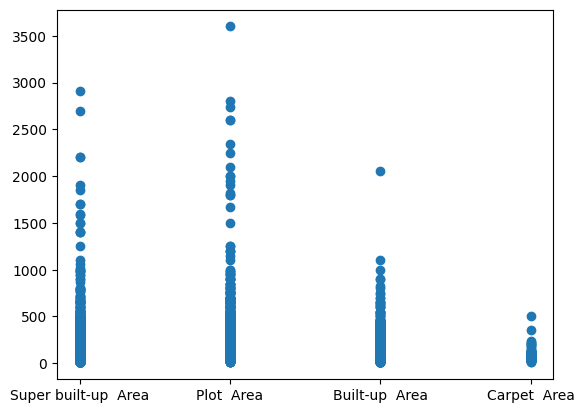

In [99]:
plt.scatter(df["area_type"],df["price"])
plt.show()

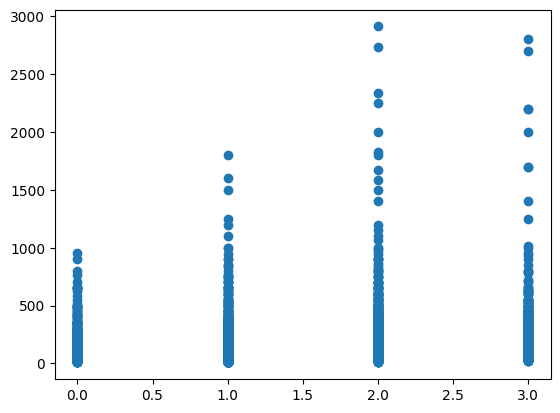

In [100]:
plt.scatter(df["balcony"],df["price"])
plt.show()

In [101]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [102]:
for i in df.columns:
    print(i,":",df[i].unique())

area_type : ['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
availability : ['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov'
 '20-Jul' '16-Sep' '15-Oct' '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan'
 '16-Nov' '20-Apr' '16-Jan' '14-Jul']
location : ['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur exten

In [103]:
df=df.drop("availability",axis="columns")

In [104]:
df_dummies=pd.get_dummies(df,columns=["area_type"])

In [105]:
df_dummies.columns

Index(['location', 'size', 'society', 'total_sqft', 'bath', 'balcony', 'price',
       'area_type_Built-up  Area', 'area_type_Carpet  Area',
       'area_type_Plot  Area', 'area_type_Super built-up  Area'],
      dtype='object')

In [106]:
tu=df_dummies["society"].nunique()
print(tu)

2688


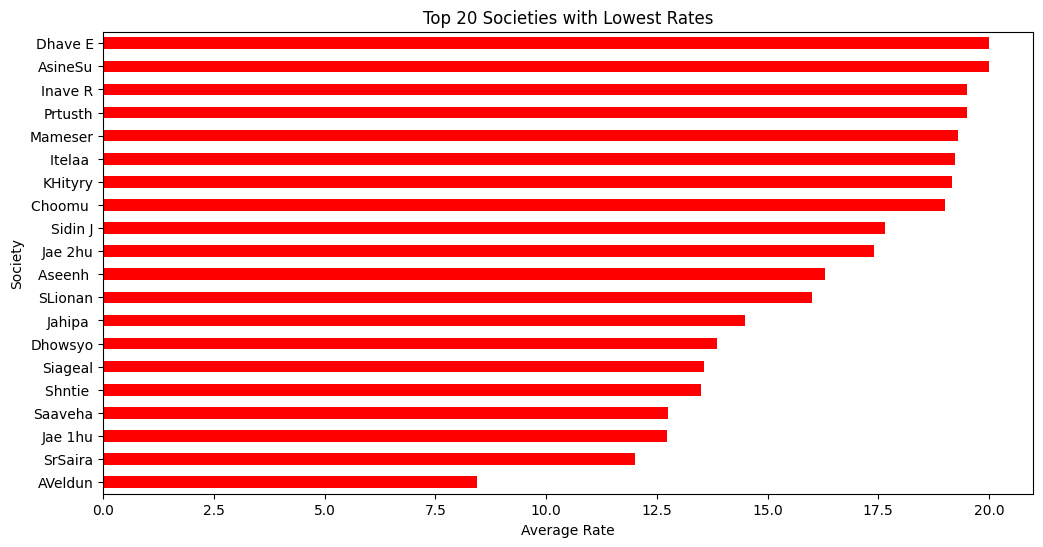

In [107]:
society_avg_rate=df_dummies.groupby("society")["price"].mean().sort_values()
plt.figure(figsize=(12, 6))
society_avg_rate.head(20).plot(kind="barh", color="red")
plt.xlabel("Average Rate")
plt.ylabel("Society")
plt.title("Top 20 Societies with Lowest Rates")
plt.show()

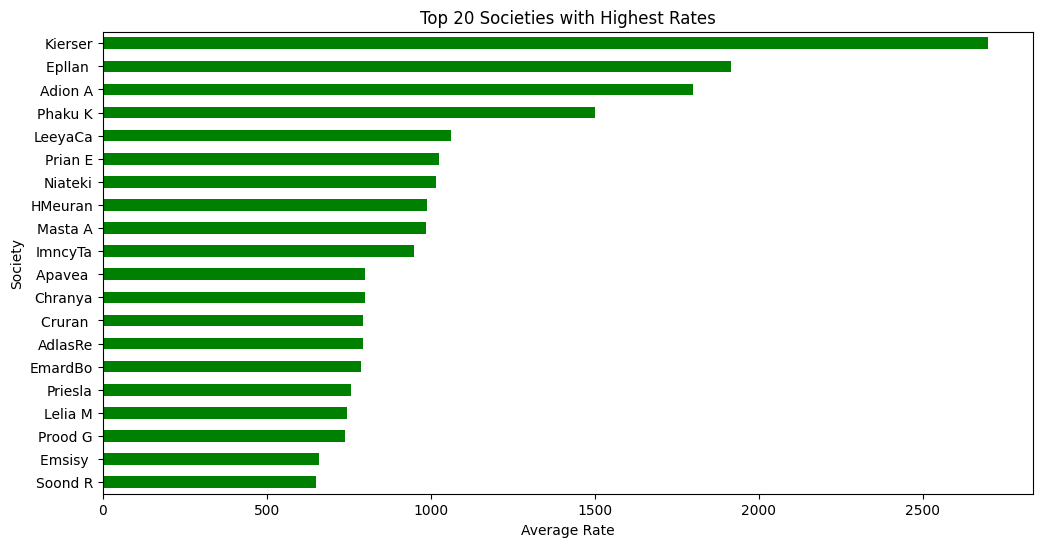

In [108]:
plt.figure(figsize=(12, 6))
society_avg_rate.tail(20).plot(kind="barh", color="green")
plt.xlabel("Average Rate")
plt.ylabel("Society")
plt.title("Top 20 Societies with Highest Rates")
plt.show()

In [109]:
bu=df_dummies.balcony.nunique()
print(bu)

4


dropping society and availability from the dataframe

In [110]:
df=df_dummies.drop("society",axis="columns")

In [111]:
df.columns

Index(['location', 'size', 'total_sqft', 'bath', 'balcony', 'price',
       'area_type_Built-up  Area', 'area_type_Carpet  Area',
       'area_type_Plot  Area', 'area_type_Super built-up  Area'],
      dtype='object')

In [112]:
df.dtypes

location                           object
size                               object
total_sqft                         object
bath                              float64
balcony                           float64
price                             float64
area_type_Built-up  Area             bool
area_type_Carpet  Area               bool
area_type_Plot  Area                 bool
area_type_Super built-up  Area       bool
dtype: object

In [113]:
df.isnull().sum()

location                            1
size                               16
total_sqft                          0
bath                               73
balcony                           609
price                               0
area_type_Built-up  Area            0
area_type_Carpet  Area              0
area_type_Plot  Area                0
area_type_Super built-up  Area      0
dtype: int64

In [114]:
df.shape

(13320, 10)

In [115]:
df=df.dropna()
len(df)

12710

In [116]:
df["bhk"]=df["size"].apply(lambda x:int(x.split(" ")[0]))

In [117]:
df.head()

,location,size,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,False,False,False,True,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,False,False,True,False,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,True,False,False,False,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,False,False,False,True,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,False,False,False,True,2


In [118]:
df[df.bhk>25]

,location,size,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,False,False,False,True,27
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,False,False,True,False,43


In [119]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True    

In [120]:
df[~df["total_sqft"].apply(is_float)]

,location,size,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,False,False,False,True,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,False,False,False,True,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,False,False,False,True,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,False,False,False,True,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,False,False,False,True,2
...,...,...,...,...,...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,0.0,38.190,False,False,False,True,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,0.0,122.000,False,False,False,True,3
13059,Harlur,2 BHK,1200 - 1470,2.0,0.0,72.760,False,False,False,True,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,0.0,59.135,False,False,False,True,2


In [121]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None  
    

In [122]:
df1=df.copy()
df1.total_sqft=df1.total_sqft.apply(convert_sqft_to_num)
df1=df1[df1.total_sqft.notnull()]
df1.head()

,location,size,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,False,False,False,True,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,False,False,True,False,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,True,False,False,False,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,False,False,False,True,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,False,False,False,True,2


In [123]:
df2=df1.copy()
df2["price_per_sqft"]=df2["price"]*100000/df2["total_sqft"]

In [124]:
df2.head()

,location,size,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,False,False,False,True,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,False,False,True,False,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,True,False,False,False,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,False,False,False,True,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,False,False,False,True,2,4250.000000


In [125]:
len(df2.location.unique())

1259

In [126]:
df2.location = df2.location.apply(lambda x: x.strip())
location_stats = df2['location'].value_counts(ascending=False)
location_stats

location
Whitefield                                         514
Sarjapur  Road                                     372
Electronic City                                    302
Kanakpura Road                                     259
Thanisandra                                        233
                                                  ... 
12th cross srinivas nagar banshankari 3rd stage      1
Tilak Nagar                                          1
Pattegarhpalya                                       1
Sarvobhogam Nagar                                    1
Prasanna layout Herohalli                            1
Name: count, Length: 1248, dtype: int64

In [127]:
len(location_stats[location_stats<=10])

1013

In [128]:
location_less_10=location_stats[location_stats<=10]
location_less_10

location
HAL 2nd Stage                                      10
Basapura                                           10
Gunjur Palya                                       10
Naganathapura                                      10
Thyagaraja Nagar                                   10
                                                   ..
12th cross srinivas nagar banshankari 3rd stage     1
Tilak Nagar                                         1
Pattegarhpalya                                      1
Sarvobhogam Nagar                                   1
Prasanna layout Herohalli                           1
Name: count, Length: 1013, dtype: int64

In [129]:
df2.location=df2["location"].apply(lambda x: "others" if x in location_less_10 else x)

In [130]:
len(df2.location.unique())

236

In [131]:
u_data=df2[df2.total_sqft/df2.bhk<=300]
len(u_data)

821

In [132]:
df2=df2[df2.total_sqft/df2.bhk>=300]

In [133]:
len(df2)

12013

In [134]:
df2.price_per_sqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

In [135]:
df2.shape

(12013, 12)

In [136]:
# def remove_pps_outliers(df):
#     df_out = pd.DataFrame()
#     for key, subdf in df.groupby('location'):
#         m = np.mean(subdf.price_per_sqft)
#         st = np.std(subdf.price_per_sqft)
#         reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
#         df_out = pd.concat([df_out,reduced_df],ignore_index=True)
#     return df_out
# df3 = remove_pps_outliers(df2)
# df3.shape  

In [137]:
def remove_outlier(d_f):
    mean = d_f["price_per_sqft"].mean()
    std = d_f["price_per_sqft"].std()
    
    lower_bound = mean - std
    upper_bound = mean + std
    
    df_output = d_f[(d_f["price_per_sqft"] > lower_bound) & (d_f["price_per_sqft"] <= upper_bound)].copy()
    
    return df_output


In [138]:
df4 = remove_outlier(df2)
print(df4.shape)

(10896, 12)


In [139]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlim(0, 4000) 
    plt.ylim(0, 400)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

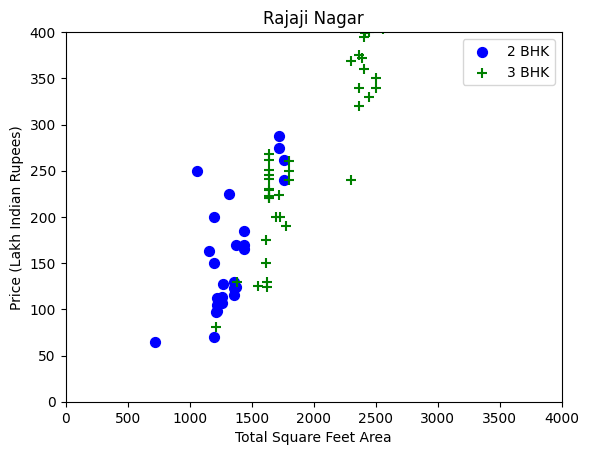

In [140]:
plot_scatter_chart(df2,"Rajaji Nagar")

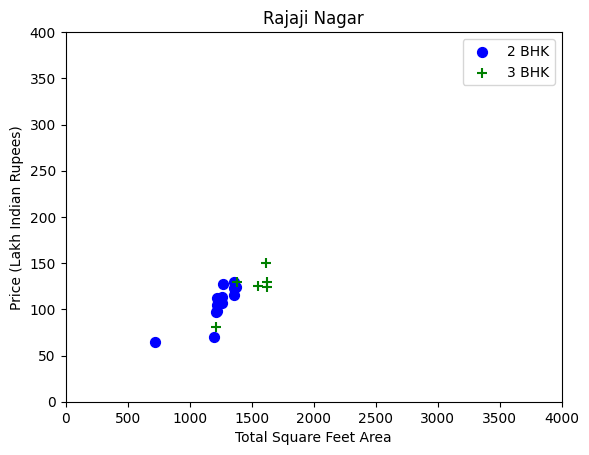

In [141]:
plot_scatter_chart(df4,"Rajaji Nagar")

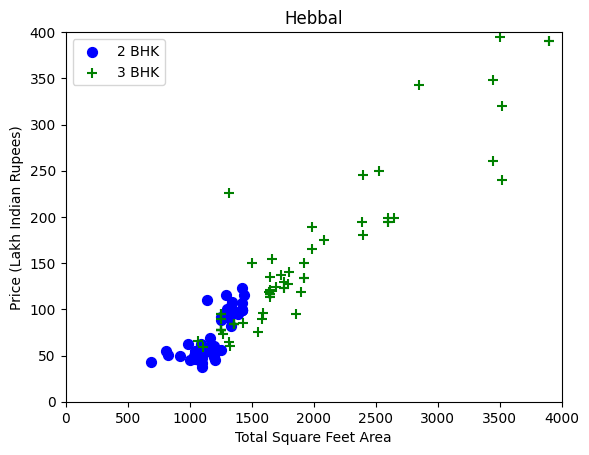

In [142]:
plot_scatter_chart(df2,"Hebbal")

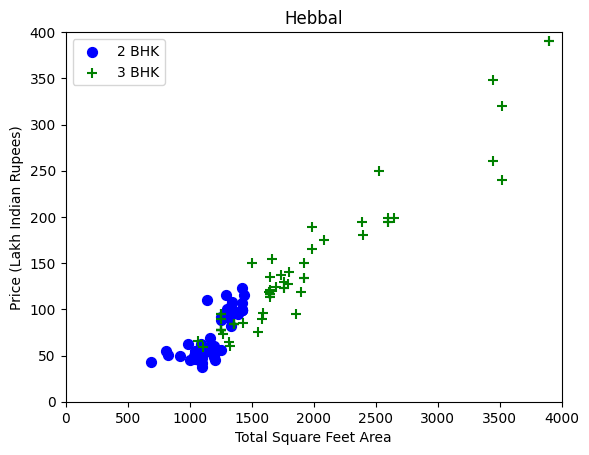

In [143]:
plot_scatter_chart(df4,"Hebbal")


In [144]:
print(df4.bhk.unique())

[ 2  4  3  1  8  6  5  7 11  9 13 10]


In [145]:
# print(df4[df4["bhk"]==1])
# df.shape

In [146]:
# df4_cleaned=df4.copy()

In [147]:
# for i in sorted(df4["bhk"].unique()):
#     if i+1 in df4["bhk"].values:
#         price_bhk=df4[df4["bhk"]==i]["price"].mean()
#         price_bhk_next=df4[df4["bhk"]==i+1]["price"].mean()
#         if price_bhk>price_bhk_next:
#             df4_cleaned=df4_cleaned.drop(df4[df4["bhk"]==i].index)
# df4=df4_cleaned            

In [148]:
df4.shape

(10896, 12)

Text(0, 0.5, 'count')

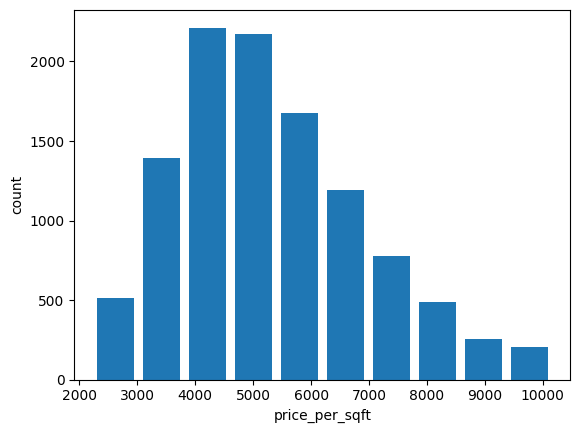

In [149]:
import matplotlib
plt.Figure(figsize=(20,10))
plt.hist(df4.price_per_sqft,rwidth=0.8)
plt.xlabel("price_per_sqft")
plt.ylabel("count")

In [150]:
df4.bath.unique()

array([ 2.,  5.,  3.,  1.,  4.,  8.,  6.,  7.,  9., 10., 13.])

Text(0, 0.5, 'Count')

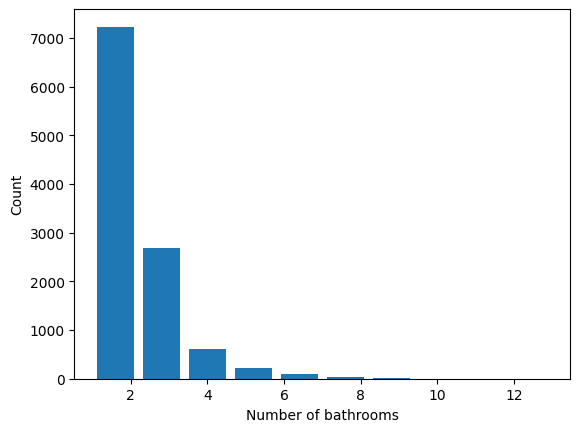

In [151]:
plt.hist(df4.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [152]:
df4[df4.bath>10]

,location,size,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,bhk,price_per_sqft
9935,others,13 BHK,5425.0,13.0,0.0,275.0,False,False,False,True,13,5069.124424


In [153]:
df4[df4.bath>df4.bhk+2]

,location,size,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,bhk,price_per_sqft
2620,others,6 BHK,11338.0,9.0,1.0,1000.0,False,False,False,True,6,8819.897689
7709,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,True,False,False,False,4,3252.032520
12103,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,False,False,False,True,3,6423.034330


In [154]:
df5 = df4[df4.bath<df4.bhk+2]
df5.head()
df5.shape

(10813, 12)

In [155]:
df5.head(5)

,location,size,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,False,False,False,True,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,False,False,True,False,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,True,False,False,False,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,False,False,False,True,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,False,False,False,True,2,4250.000000


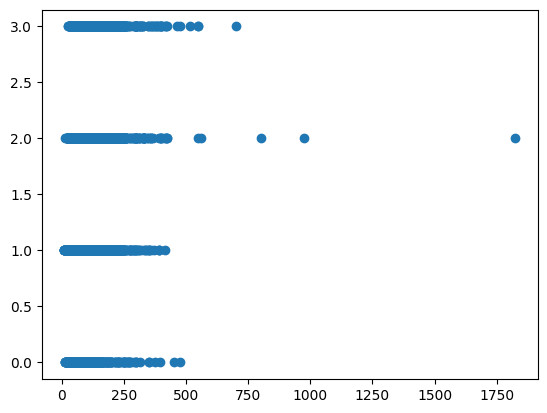

In [156]:
plt.scatter(df5.price,df5.balcony)

In [157]:
df6 = df5.drop(['size','price_per_sqft',"balcony"],axis='columns')
df6.head(3)

,location,total_sqft,bath,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,False,False,False,True,2
1,Chikka Tirupathi,2600.0,5.0,120.00,False,False,True,False,4
2,Uttarahalli,1440.0,2.0,62.00,True,False,False,False,3


In [158]:
bool_cols=df6.columns[df6.dtypes=="bool"]
bool_cols
for i in bool_cols:
    df6[i]=df6[i].map({True:1,False:0})

In [159]:
df6.head()

,location,total_sqft,bath,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,0,0,0,1,2
1,Chikka Tirupathi,2600.0,5.0,120.00,0,0,1,0,4
2,Uttarahalli,1440.0,2.0,62.00,1,0,0,0,3
3,Lingadheeranahalli,1521.0,3.0,95.00,0,0,0,1,3
4,Kothanur,1200.0,2.0,51.00,0,0,0,1,2


In [160]:
df6.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli',
       'Lingadheeranahalli', 'Kothanur', 'Whitefield', 'Marathahalli',
       '7th Phase JP Nagar', 'Gottigere', 'Sarjapur', 'Mysore Road',
       'Bisuvanahalli', 'Raja Rajeshwari Nagar', 'others', 'Kengeri',
       'Binny Pete', 'Bellandur', 'Thanisandra', 'Electronic City',
       'Ramagondanahalli', 'Yelahanka', 'Hebbal', 'Kanakpura Road',
       'Electronics City Phase 1', 'Kundalahalli', 'Chikkalasandra',
       'Sarjapur  Road', 'Doddathoguru', 'Bhoganhalli',
       'Lakshminarayana Pura', 'Begur Road', 'Varthur', 'Bommanahalli',
       'Gunjur', 'Hegde Nagar', 'Haralur Road', 'Hennur Road',
       'Kothannur', 'Kalena Agrahara', 'ISRO Layout', 'Garudachar Palya',
       'Dasanapura', 'Kasavanhalli', 'Sanjay nagar', 'Domlur',
       'Sarjapura - Attibele Road', 'Yeshwanthpur', 'Chandapura',
       'Nagarbhavi', 'Devanahalli', 'Ramamurthy Nagar', 'Malleshwaram',
       'Akshaya Nagar', 'Shampura', 'Kadugodi', '

In [161]:
dummies=pd.get_dummies(df6.location,drop_first=True)

In [162]:
dummies.head()

,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [163]:
bool_col=dummies.columns[dummies.dtypes=="bool"]
for i in bool_col:
    dummies[i]=dummies[i].map({True:1,False:0})

In [164]:
dummies.head()

,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [165]:
df7=pd.concat([df6,dummies],axis="columns")

In [166]:
df7.head()

,location,total_sqft,bath,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,bhk,1st Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,Electronic City Phase II,1056.0,2.0,39.07,0,0,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
1,Chikka Tirupathi,2600.0,5.0,120.00,0,0,1,0,4,0,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,1440.0,2.0,62.00,1,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,1521.0,3.0,95.00,0,0,0,1,3,0,...,0,0,0,0,0,0,0,0,0,0
4,Kothanur,1200.0,2.0,51.00,0,0,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0


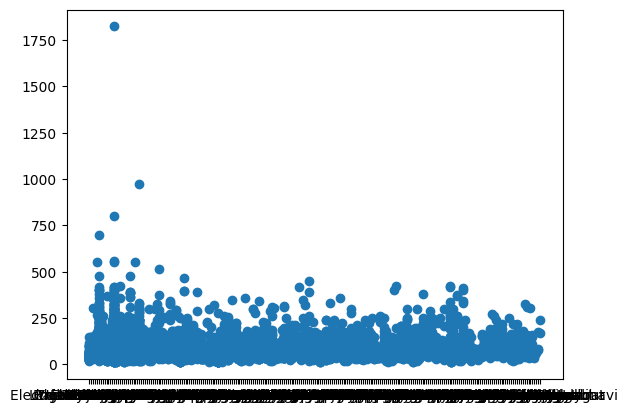

In [167]:
plt.scatter(df7.location,df7.price)
plt.show()

In [168]:
df8=df7.drop("location",axis="columns")
df8.head()

,total_sqft,bath,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,1056.0,2.0,39.07,0,0,0,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,120.00,0,0,1,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,1,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,0,0,0,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,0,0,0,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0


Building Model....

In [169]:
df8.shape

(10813, 242)

In [170]:
x=df8.drop(["price"],axis="columns")
x.head(1)

,total_sqft,bath,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,1056.0,2.0,0,0,0,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [171]:
x.shape

(10813, 241)

In [172]:
y=df8.price
y.head(1)

0    39.07
Name: price, dtype: float64

In [173]:
y.shape

(10813,)

In [174]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [193]:
import os

train_data_path:str=os.path.join("server/artifacts","train.csv")
x_train.to_csv(train_data_path)
test_data_path:str=os.path.join("server/artifacts","test.csv")
x_test.to_csv(test_data_path)
raw_data:str=os.path.join("server/artifacts","raw_data.csv")
df.to_csv(raw_data)

In [176]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [177]:
lr.score(x_test,y_test)

0.8102143784122506

In [178]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=42)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.81021438, 0.81793759, 0.83153519, 0.80982155, 0.83528545])

Finding the best model

In [179]:
import pandas as pd
from sklearn.model_selection import GridSearchCV,ShuffleSplit
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.tree import DecisionTreeRegressor
models=[
    ("LinearRegression",LinearRegression(),{"fit_intercept":[True,False]}),
    ("Lasso",Lasso(),{"alpha":[1,2],"selection":["random","cyclic"]}),
    ("decision_tree",DecisionTreeRegressor(),{"criterion":["squared_error","friedman_mse"],"splitter":["best","random"]})
]
def find_best_model(x,y):
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=18)
    result=[]
    for name,model,params, in models:
        gs=GridSearchCV(model,params,cv=cv,return_train_score=False)
        gs.fit(x,y)
        result.append({"model":name,"best_score":gs.best_score_,"best_params":gs.best_params_,})
    return pd.DataFrame(result)    

In [180]:
find_best_model(x,y)

,model,best_score,best_params
0,LinearRegression,0.802937,{'fit_intercept': False}
1,Lasso,0.760476,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.741640,"{'criterion': 'squared_error', 'splitter': 'be..."


In [181]:
import numpy as np

def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(x.columns == location)[0]  # Finding the location index

    x_sample = np.zeros(len(x.columns))  # Initialize an array of zeros
    x_sample[0] = sqft
    x_sample[1] = bath
    x_sample[2] = bhk

    if len(loc_index) > 0:  # Ensure location exists in features
        x_sample[loc_index[0]] = 1  

    return lr.predict([x_sample])[0]  

predict_price('Chikka Tirupathi',2600,5,3)

c:\Users\gaman\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(103.19796089970622)

In [182]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

c:\Users\gaman\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(92.43451369911068)

In [183]:
import pickle
with open("banglore_home_prices_model.pickel","wb") as f:
    pickle.dump(lr,f)

In [184]:
import json
columns={
    "data_columns":[col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))